In [1]:
pip install opencv-python-headless matplotlib pandas


Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---- ----------------------------------- 4.5/38.8 MB 22.4 MB/s eta 0:00:02
   -------- ------------------------------- 7.9/38.8 MB 19.5 MB/s eta 0:00:02
   ---------- ----------------------------- 9.7/38.8 MB 15.9 MB/s eta 0:00:02
   ----------- ---------------------------- 11.5/38.8 MB 13.6 MB/s eta 0:00:02
   ------------- -------------------------- 13.4/38.8 MB 12.5 MB/s eta 0:00:03
   --------------- ------------------------ 15.2/38.8 MB 12.0 MB/s eta 0:00:02
   ----------------- ---------------------- 17.3/38.8 MB 11.6 MB/s eta 0:00:02
   -------------------- ------------------- 19.7/38.8 MB 11.5 MB/s eta 0:00:02
   ---------------------- ----------------- 22.3/38.8 MB 11.6 MB/s eta 0:00:02
   ------------------------- -------------- 24.9/38.8 MB 11.7 MB/s eta 0:00:02
   ---------------------------- ----------- 27.5/38.8 MB 11.7 MB/

In [1]:
import cv2
import matplotlib.pyplot as plt
import os
import json
from parsers.pascal_voc_parser import PascalVOCParser
from parsers.coco_parser import COCOParser
from parsers.labelme_parser import LabelMeParser
from parsers.yolo_parser import YOLOParser

voc_parser = PascalVOCParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.xml")
voc_annotations = voc_parser.parse()
print(voc_annotations)


{'folder': 'VOC2012', 'filename': '2008_000618.jpg', 'path': None, 'size': {'width': 500, 'height': 333, 'depth': 3}, 'objects': [{'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 151, 'ymin': 52, 'xmax': 262, 'ymax': 240}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 267, 'ymin': 118, 'xmax': 396, 'ymax': 252}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 322, 'ymin': 234, 'xmax': 399, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 20, 'ymin': 191, 'xmax': 158, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 1, 'ymin': 157, 'xmax': 66, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 59, 'ymin': 124, 'xmax': 127, 'ymax': 200}}]}


In [8]:
def visualize_voc_annotations(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Check if annotations are in the expected format
    if 'annotation' not in annotations:
        raise ValueError("Annotations format is not correct. Missing 'annotation' key.")

    objects = annotations['annotation'].get('object', [])

    # Draw bounding boxes
    for obj in objects:
        bbox = obj.get('bndbox', {})
        x_min = int(bbox.get('xmin', 0))
        y_min = int(bbox.get('ymin', 0))
        x_max = int(bbox.get('xmax', 0))
        y_max = int(bbox.get('ymax', 0))
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
    # Show the image with annotations
    plt.imshow(image)
    plt.axis('off')
    plt.show()


In [3]:
def visualize_coco_annotations(image_path, annotations):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a matplotlib figure
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw bounding boxes
    for ann in annotations:
        bbox = ann['bbox']
        x_min, y_min, width, height = bbox
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), width, height, edgecolor='red', facecolor='none'))
        plt.text(x_min, y_min, str(ann['category_id']), bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.axis('off')
    plt.show()


In [4]:
def visualize_labelme_annotations(image_path, annotations):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a matplotlib figure
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw bounding boxes
    for shape in annotations['shapes']:
        points = shape['points']
        x_min, y_min = min(p[0] for p in points), min(p[1] for p in points)
        x_max, y_max = max(p[0] for p in points), max(p[1] for p in points)
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', facecolor='none'))
        plt.text(x_min, y_min, shape['label'], bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.axis('off')
    plt.show()


In [5]:
def visualize_yolo_annotations(image_path, annotations):
    # Read the image
    image = cv2.imread(image_path)
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Create a matplotlib figure
    plt.figure(figsize=(10, 10))
    plt.imshow(image)
    
    # Draw bounding boxes
    for ann in annotations:
        x_center, y_center, width, height = ann['bbox']
        x_min = int((x_center - width / 2) * image.shape[1])
        y_min = int((y_center - height / 2) * image.shape[0])
        x_max = int((x_center + width / 2) * image.shape[1])
        y_max = int((y_center + height / 2) * image.shape[0])
        plt.gca().add_patch(plt.Rectangle((x_min, y_min), x_max - x_min, y_max - y_min, edgecolor='red', facecolor='none'))
        plt.text(x_min, y_min, str(ann['category_id']), bbox=dict(facecolor='yellow', alpha=0.5))
    
    plt.axis('off')
    plt.show()


ValueError: Annotations format is not correct. Missing 'annotation' key.

In [7]:
print(voc_annotations)


{'folder': 'VOC2012', 'filename': '2008_000618.jpg', 'path': None, 'size': {'width': 500, 'height': 333, 'depth': 3}, 'objects': [{'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 151, 'ymin': 52, 'xmax': 262, 'ymax': 240}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 267, 'ymin': 118, 'xmax': 396, 'ymax': 252}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 322, 'ymin': 234, 'xmax': 399, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 20, 'ymin': 191, 'xmax': 158, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 1, 'ymin': 157, 'xmax': 66, 'ymax': 333}}, {'name': 'person', 'pose': None, 'truncated': None, 'difficult': None, 'bndbox': {'xmin': 59, 'ymin': 124, 'xmax': 127, 'ymax': 200}}]}


In [12]:
print(json.dumps(voc_annotations, indent=4))


{
    "folder": "VOC2012",
    "filename": "2008_000618.jpg",
    "path": null,
    "size": {
        "width": 500,
        "height": 333,
        "depth": 3
    },
    "objects": [
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 151,
                "ymin": 52,
                "xmax": 262,
                "ymax": 240
            }
        },
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 267,
                "ymin": 118,
                "xmax": 396,
                "ymax": 252
            }
        },
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 322,
                "ymin": 234,
                "xmax": 3

In [13]:
def visualize_voc_annotations(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Print the structure of annotations
    print(json.dumps(annotations, indent=4))
    
    # Check if 'annotation' is a top-level key or nested
    if isinstance(annotations, dict):
        # Check for 'annotation' key
        if 'annotation' in annotations:
            objects = annotations['annotation'].get('object', [])
        else:
            # Handle other possible structures
            objects = annotations.get('objects', [])  # Example of another possible key
    elif isinstance(annotations, list):
        # Handle list of annotations (if applicable)
        objects = annotations
    else:
        raise ValueError("Annotations format is not correct. It should be a dictionary or list.")

    # Draw bounding boxes
    for obj in objects:
        bbox = obj.get('bndbox', {})
        x_min = int(bbox.get('xmin', 0))
        y_min = int(bbox.get('ymin', 0))
        x_max = int(bbox.get('xmax', 0))
        y_max = int(bbox.get('ymax', 0))
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Show the image with annotations
    plt.imshow(image)
    plt.axis('off')
    plt.show()


{
    "folder": "VOC2012",
    "filename": "2008_000618.jpg",
    "path": null,
    "size": {
        "width": 500,
        "height": 333,
        "depth": 3
    },
    "objects": [
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 151,
                "ymin": 52,
                "xmax": 262,
                "ymax": 240
            }
        },
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 267,
                "ymin": 118,
                "xmax": 396,
                "ymax": 252
            }
        },
        {
            "name": "person",
            "pose": null,
            "truncated": null,
            "difficult": null,
            "bndbox": {
                "xmin": 322,
                "ymin": 234,
                "xmax": 3

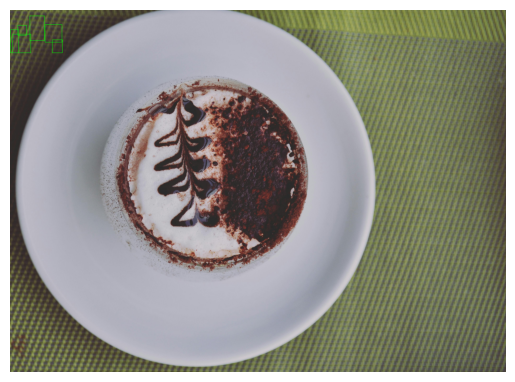

TypeError: string indices must be integers, not 'str'

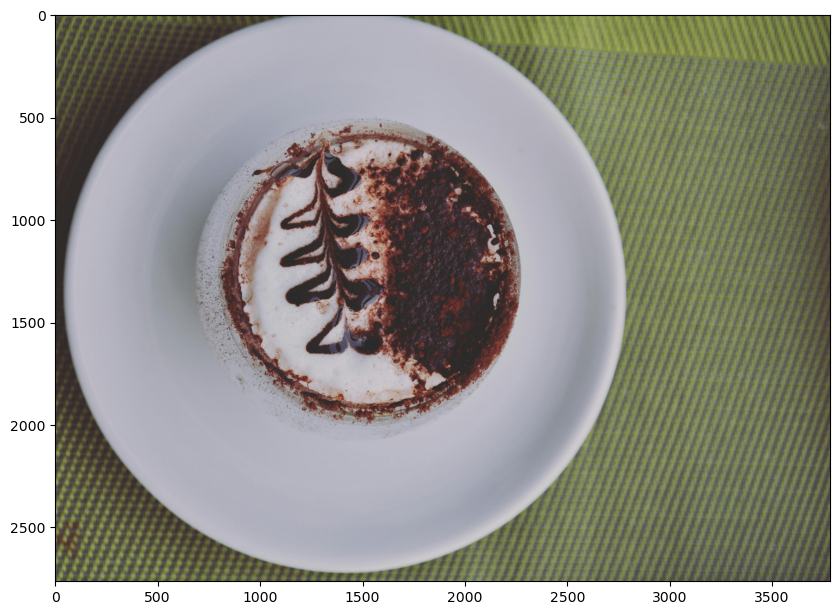

In [14]:
# Define the image path
image_path = "C:\Code\Multi-Format Annotation Handler and Converter\data\sample.jpg"  # Make sure this path is correct and the image exists

# Pascal VOC
voc_parser = PascalVOCParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.xml")
voc_annotations = voc_parser.parse()
visualize_voc_annotations(image_path, voc_annotations)

# COCO
coco_parser = COCOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.json")
coco_annotations = coco_parser.parse()
visualize_coco_annotations(image_path, coco_annotations)

# LabelMe
labelme_parser = LabelMeParser("C:\Code\Multi-Format Annotation Handler and Converter\data\labelchess.json")
labelme_annotations = labelme_parser.parse()
visualize_labelme_annotations(image_path, labelme_annotations)

# YOLO
yolo_parser = YOLOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.txt")
yolo_annotations = yolo_parser.parse()
visualize_yolo_annotations(image_path, yolo_annotations)


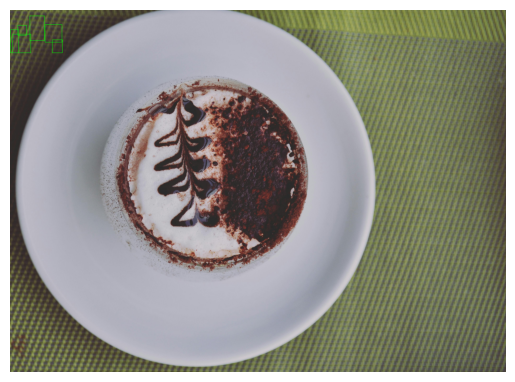

In [16]:
import cv2
import matplotlib.pyplot as plt

def visualize_voc_annotations(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Check if 'objects' is present
    objects = annotations.get('objects', [])
    
    # Draw bounding boxes
    for obj in objects:
        bbox = obj.get('bndbox', {})
        x_min = int(bbox.get('xmin', 0))
        y_min = int(bbox.get('ymin', 0))
        x_max = int(bbox.get('xmax', 0))
        y_max = int(bbox.get('ymax', 0))
        cv2.rectangle(image, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

    # Show the image with annotations
    plt.imshow(image)
    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:\Code\Multi-Format Annotation Handler and Converter\data\sample.jpg"
voc_parser = PascalVOCParser("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.xml")
voc_annotations = voc_parser.parse()
visualize_voc_annotations(image_path, voc_annotations)


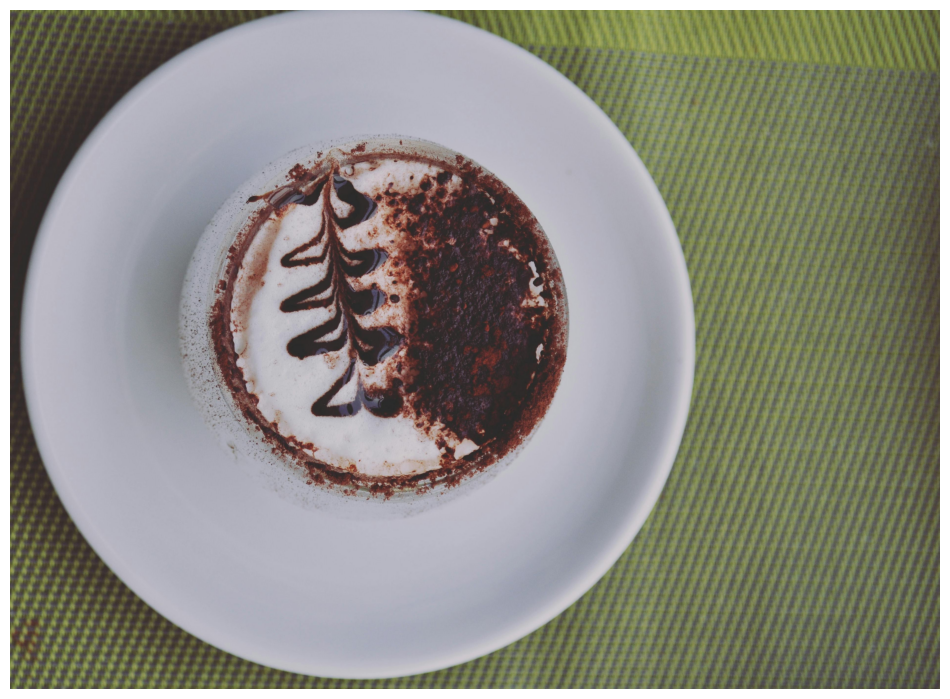

In [17]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

def visualize_coco_annotations(image_path, annotations):
    # Load image
    image = cv2.imread(image_path)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_path}")

    # Convert BGR to RGB for matplotlib
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Check if 'annotations' key exists
    coco_annotations = annotations.get('annotations', [])
    
    # Draw bounding boxes
    fig, ax = plt.subplots(1, figsize=(12, 9))
    ax.imshow(image)

    for ann in coco_annotations:
        bbox = ann.get('bbox', [])
        if len(bbox) == 4:
            x_min, y_min, width, height = bbox
            rect = patches.Rectangle((x_min, y_min), width, height, linebwidth=1, edgecolor='r', facecolor='none')
            ax.add_patch(rect)

    plt.axis('off')
    plt.show()

# Example usage:
image_path = "C:\Code\Multi-Format Annotation Handler and Converter\data\sample.jpg"
coco_parser = COCOParser("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json")
coco_annotations = coco_parser.parse()
visualize_coco_annotations(image_path, coco_annotations)


In [19]:
import cv2
import matplotlib.pyplot as plt

def visualize_yolo_annotations(image_path, annotations):
    # Load the image
    image = cv2.imread(image_path)
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
    
    # Draw bounding boxes
    for ann in annotations:
        class_id, x_center, y_center, width, height = ann
        h, w, _ = image.shape
        x_min = int((x_center - width / 2) * w)
        y_min = int((y_center - height / 2) * h)
        x_max = int((x_center + width / 2) * w)
        y_max = int((y_center + height / 2) * h)

        # Draw the bounding box
        cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)
        
        # Optionally, add class label text
        label = f"Class {class_id}"
        cv2.putText(image_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


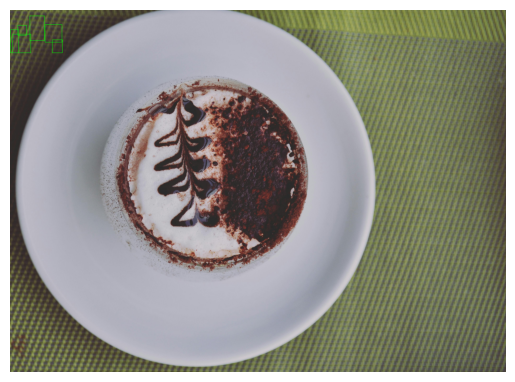

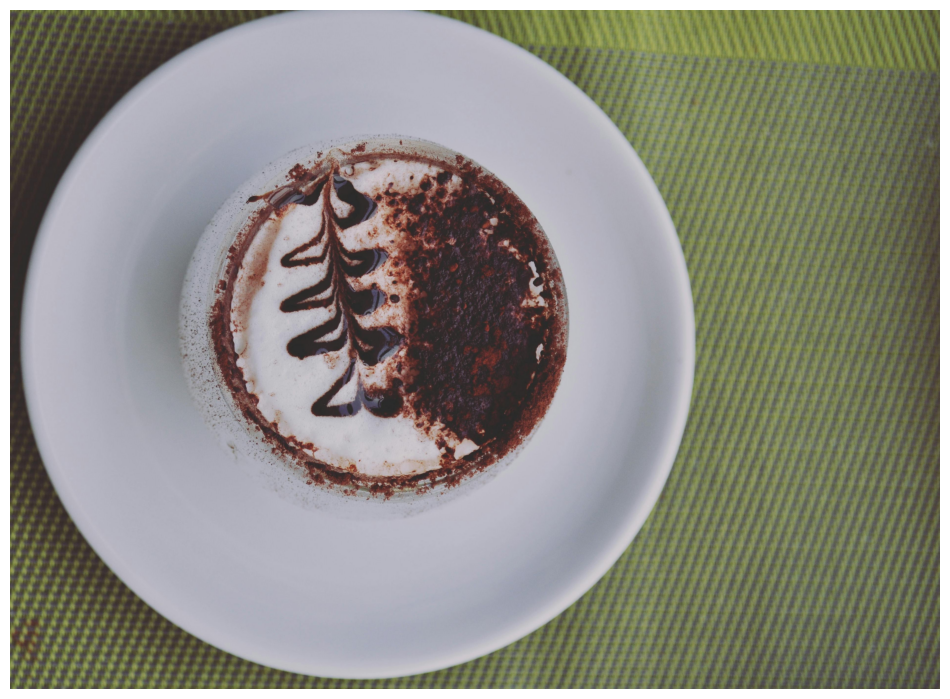

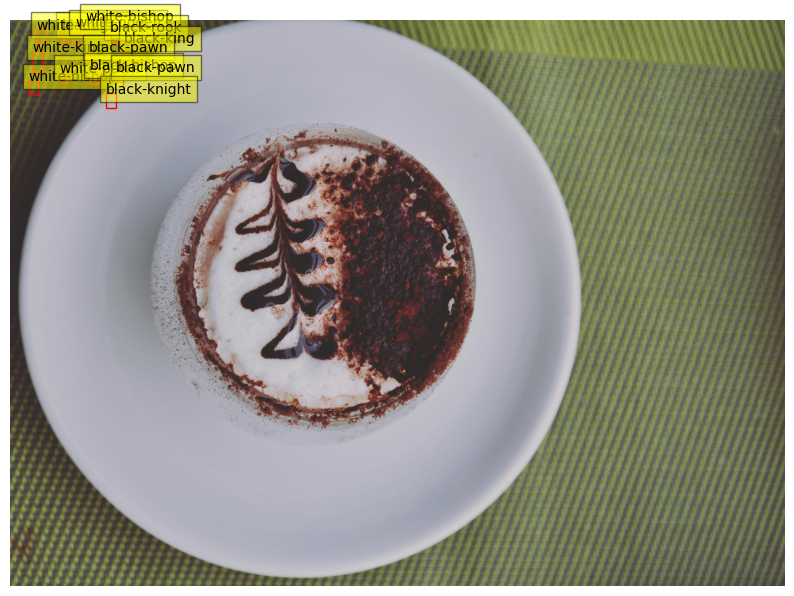

Skipping invalid annotation: {'class_id': 3, 'center_x': 0.519426, 'center_y': 0.449324, 'width': 0.153716, 'height': 0.400338}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.181588, 'center_y': 0.498733, 'width': 0.363176, 'height': 0.985642}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.525338, 'center_y': 0.541807, 'width': 0.030405, 'height': 0.058277}


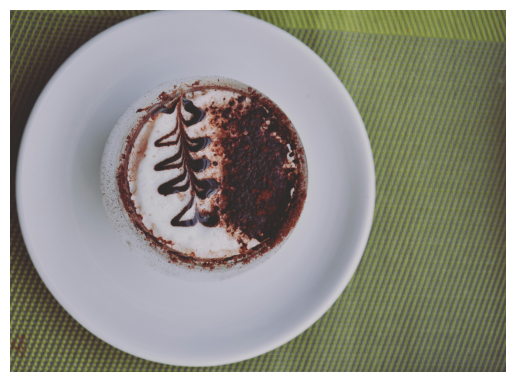

In [30]:
# Define the image path
image_path = "C:\Code\Multi-Format Annotation Handler and Converter\data\sample.jpg"  # Make sure this path is correct and the image exists

# Pascal VOC
voc_parser = PascalVOCParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.xml")
voc_annotations = voc_parser.parse()
visualize_voc_annotations(image_path, voc_annotations)

# COCO
coco_parser = COCOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.json")
coco_annotations = coco_parser.parse()
visualize_coco_annotations(image_path, coco_annotations)

# LabelMe
labelme_parser = LabelMeParser("C:\Code\Multi-Format Annotation Handler and Converter\data\labelchess.json")
labelme_annotations = labelme_parser.parse()
visualize_labelme_annotations(image_path, labelme_annotations)

# YOLO
yolo_parser = YOLOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.txt")
yolo_annotations = yolo_parser.parse()
visualize_yolo_annotations(image_path, yolo_annotations)


In [28]:
import cv2
import matplotlib.pyplot as plt

def visualize_yolo_annotations(image_path, annotations):
    # Load the image
    image = cv2.imread(image_path)
    if image is None:
        raise ValueError(f"Image not found: {image_path}")
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Draw bounding boxes
    for ann in annotations:
        if len(ann) != 5:
            print(f"Invalid annotation format: {ann}")
            continue
        
        try:
            class_id, x_center, y_center, width, height = map(float, ann)  # Ensure all values are float
            h, w, _ = image.shape
            
            # Calculate bounding box coordinates
            x_min = int((x_center - width / 2) * w)
            y_min = int((y_center - height / 2) * h)
            x_max = int((x_center + width / 2) * w)
            y_max = int((y_center + height / 2) * h)

            # Draw the bounding box
            cv2.rectangle(image_rgb, (x_min, y_min), (x_max, y_max), (0, 255, 0), 2)

            # Optionally, add class label text
            label = f"Class {int(class_id)}"
            cv2.putText(image_rgb, label, (x_min, y_min - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (255, 0, 0), 2)
        except ValueError:
            print(f"Skipping invalid annotation: {ann}")

    # Display the image
    plt.imshow(image_rgb)
    plt.axis('off')
    plt.show()


Skipping invalid annotation: {'class_id': 3, 'center_x': 0.519426, 'center_y': 0.449324, 'width': 0.153716, 'height': 0.400338}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.181588, 'center_y': 0.498733, 'width': 0.363176, 'height': 0.985642}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.525338, 'center_y': 0.541807, 'width': 0.030405, 'height': 0.058277}


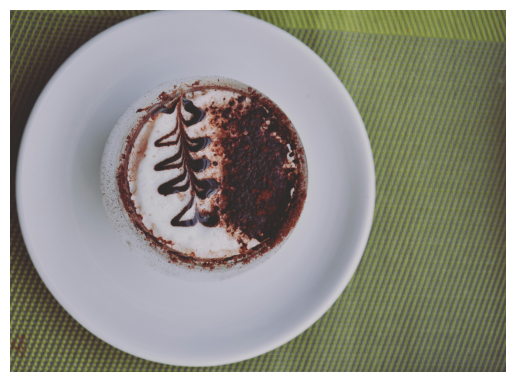

In [29]:

yolo_parser = YOLOParser("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.txt")
yolo_annotations = yolo_parser.parse()
image_path = 'C:/Code/Multi-Format Annotation Handler and Converter/data/sample.jpg'
visualize_yolo_annotations(image_path, yolo_annotations)


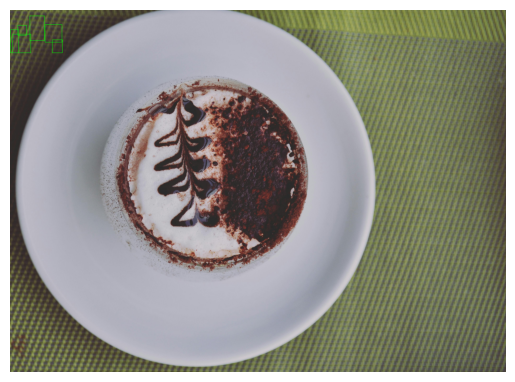

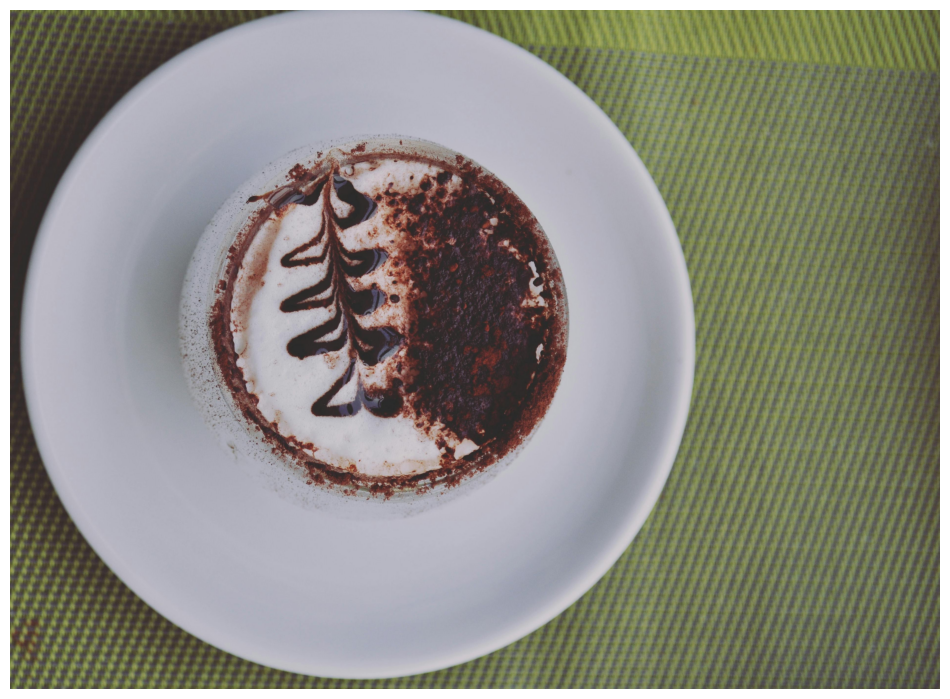

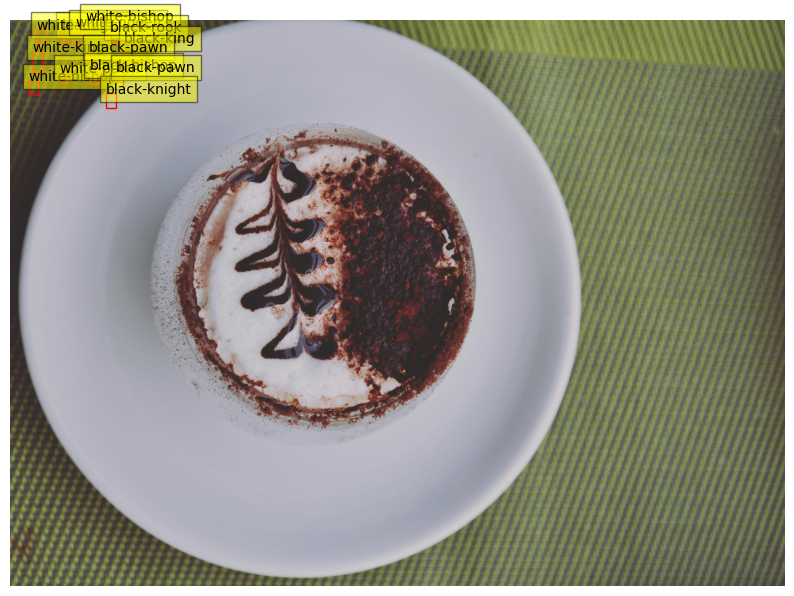

Skipping invalid annotation: {'class_id': 3, 'center_x': 0.519426, 'center_y': 0.449324, 'width': 0.153716, 'height': 0.400338}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.181588, 'center_y': 0.498733, 'width': 0.363176, 'height': 0.985642}
Skipping invalid annotation: {'class_id': 1, 'center_x': 0.525338, 'center_y': 0.541807, 'width': 0.030405, 'height': 0.058277}


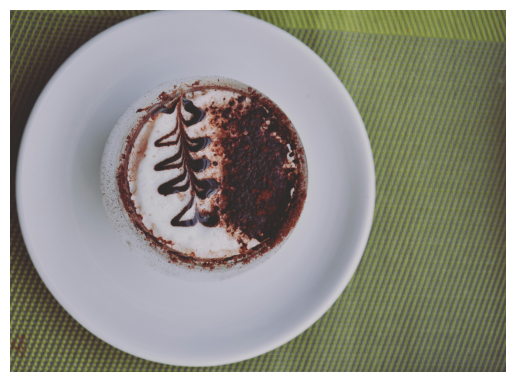

In [31]:
# Define the image path
image_path = "C:\Code\Multi-Format Annotation Handler and Converter\data\sample.jpg"  # Make sure this path is correct and the image exists

# Pascal VOC
voc_parser = PascalVOCParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.xml")
voc_annotations = voc_parser.parse()
visualize_voc_annotations(image_path, voc_annotations)

# COCO
coco_parser = COCOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.json")
coco_annotations = coco_parser.parse()
visualize_coco_annotations(image_path, coco_annotations)

# LabelMe
labelme_parser = LabelMeParser("C:\Code\Multi-Format Annotation Handler and Converter\data\labelchess.json")
labelme_annotations = labelme_parser.parse()
visualize_labelme_annotations(image_path, labelme_annotations)

# YOLO
yolo_parser = YOLOParser("C:\Code\Multi-Format Annotation Handler and Converter\data\sample.txt")
yolo_annotations = yolo_parser.parse()
visualize_yolo_annotations(image_path, yolo_annotations)


In [32]:
import xml.etree.ElementTree as ET
import os

def extract_classes_from_voc(input_dir):
    classes = []
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.xml'):
            tree = ET.parse(os.path.join(input_dir, file_name))
            root = tree.getroot()
            for obj in root.findall('object'):
                class_name = obj.find('name').text
                classes.append(class_name)
    return classes


In [33]:
#coco

import json

def extract_classes_from_coco(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)
    class_ids = [annotation['category_id'] for annotation in data['annotations']]
    category_map = {cat['id']: cat['name'] for cat in data['categories']}
    classes = [category_map[id] for id in class_ids]
    return classes


In [34]:
#labelme

import json

def extract_classes_from_labelme(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)
    classes = [shape['label'] for shape in data['shapes']]
    return classes


In [35]:
#yolo 
def extract_classes_from_yolo(input_dir):
    classes = []
    for file_name in os.listdir(input_dir):
        if file_name.endswith('.txt'):
            with open(os.path.join(input_dir, file_name), 'r') as f:
                for line in f:
                    # YOLO format: class_id x_center y_center width height
                    parts = line.strip().split()
                    if len(parts) > 0:
                        class_id = int(parts[0])
                        classes.append(class_id)
    return classes


In [36]:
import pandas as pd
import matplotlib.pyplot as plt

def plot_class_distribution(classes):
    # Create a DataFrame
    df = pd.DataFrame({'class': classes})
    
    # Count the occurrences of each class
    class_counts = df['class'].value_counts()
    
    # Plot the distribution
    plt.figure(figsize=(10, 6))
    class_counts.plot(kind='bar')
    plt.xlabel('Class')
    plt.ylabel('Number of Annotations')
    plt.title('Class Distribution')
    plt.show()


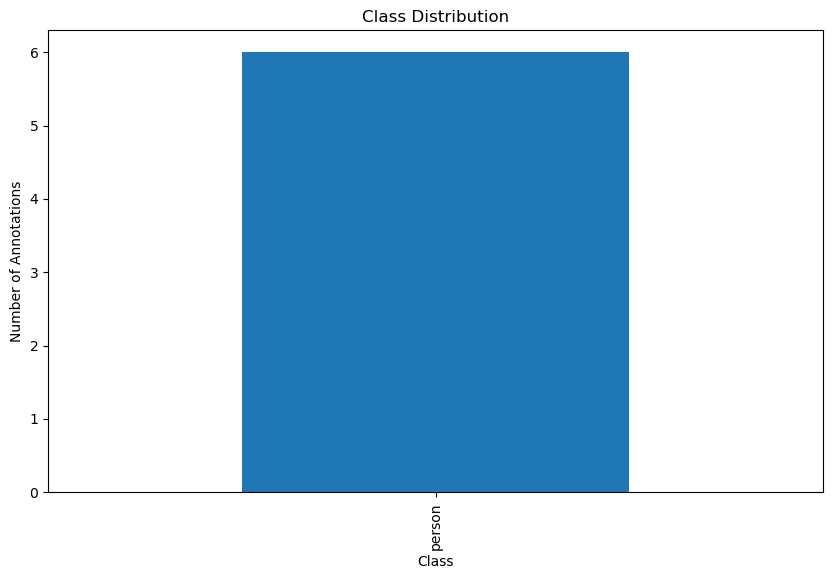

In [37]:
# Load annotations
voc_classes = extract_classes_from_voc("C:/Code/Multi-Format Annotation Handler and Converter/data")

# Plot distribution
plot_class_distribution(voc_classes)


In [43]:
import json
import matplotlib.pyplot as plt

def extract_classes_from_coco(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)
    
    print("Keys in the JSON file:", data.keys())  # Debug print to see the keys

    if 'annotations' not in data:
        raise KeyError("The COCO JSON file must contain 'annotations' key.")
    
    # Embedded category information
    categories = [
        {"id": 1, "name": "person"},
        {"id": 2, "name": "bicycle"},
        {"id": 3, "name": "car"},
        {"id": 4, "name": "motorcycle"},
        {"id": 5, "name": "airplane"},
        {"id": 6, "name": "bus"},
        {"id": 7, "name": "train"},
        {"id": 8, "name": "truck"},
        {"id": 9, "name": "boat"},
        {"id": 10, "name": "traffic light"},
        {"id": 11, "name": "fire hydrant"},
        {"id": 13, "name": "stop sign"},
        {"id": 14, "name": "parking meter"},
        {"id": 15, "name": "bench"},
        {"id": 16, "name": "bird"},
        {"id": 17, "name": "cat"},
        {"id": 18, "name": "dog"},
        {"id": 19, "name": "horse"},
        {"id": 20, "name": "sheep"},
        {"id": 21, "name": "cow"},
        {"id": 22, "name": "elephant"},
        {"id": 23, "name": "bear"},
        {"id": 24, "name": "zebra"},
        {"id": 25, "name": "giraffe"},
        {"id": 27, "name": "backpack"},
        {"id": 28, "name": "umbrella"},
        {"id": 31, "name": "handbag"},
        {"id": 32, "name": "tie"},
        {"id": 33, "name": "suitcase"},
        {"id": 34, "name": "frisbee"},
        {"id": 35, "name": "skis"},
        {"id": 36, "name": "snowboard"},
        {"id": 37, "name": "sports ball"},
        {"id": 38, "name": "kite"},
        {"id": 39, "name": "baseball bat"},
        {"id": 40, "name": "baseball glove"},
        {"id": 41, "name": "skateboard"},
        {"id": 42, "name": "surfboard"},
        {"id": 43, "name": "tennis racket"},
        {"id": 44, "name": "bottle"},
        {"id": 46, "name": "wine glass"},
        {"id": 47, "name": "cup"},
        {"id": 48, "name": "fork"},
        {"id": 49, "name": "knife"},
        {"id": 50, "name": "spoon"},
        {"id": 51, "name": "bowl"},
        {"id": 52, "name": "banana"},
        {"id": 53, "name": "apple"},
        {"id": 54, "name": "sandwich"},
        {"id": 55, "name": "orange"},
        {"id": 56, "name": "broccoli"},
        {"id": 57, "name": "carrot"},
        {"id": 58, "name": "hot dog"},
        {"id": 59, "name": "pizza"},
        {"id": 60, "name": "donut"},
        {"id": 61, "name": "cake"},
        {"id": 62, "name": "chair"},
        {"id": 63, "name": "couch"},
        {"id": 64, "name": "potted plant"},
        {"id": 65, "name": "bed"},
        {"id": 67, "name": "dining table"},
        {"id": 70, "name": "toilet"},
        {"id": 72, "name": "tv"},
        {"id": 73, "name": "laptop"},
        {"id": 74, "name": "mouse"},
        {"id": 75, "name": "remote"},
        {"id": 76, "name": "keyboard"},
        {"id": 77, "name": "cell phone"},
        {"id": 78, "name": "microwave"},
        {"id": 79, "name": "oven"},
        {"id": 80, "name": "toaster"},
        {"id": 81, "name": "sink"},
        {"id": 82, "name": "refrigerator"},
        {"id": 84, "name": "book"},
        {"id": 85, "name": "clock"},
        {"id": 86, "name": "vase"},
        {"id": 87, "name": "scissors"},
        {"id": 88, "name": "teddy bear"},
        {"id": 89, "name": "hair drier"},
        {"id": 90, "name": "toothbrush"}
    ]

    category_map = {cat['id']: cat['name'] for cat in categories}

    class_ids = [annotation.get('category_id', None) for annotation in data['annotations'] if 'category_id' in annotation]
    classes = [category_map[id] for id in class_ids if id in category_map]
    
    return classes

def plot_class_distribution(classes):
    from collections import Counter
    import matplotlib.pyplot as plt

    class_counts = Counter(classes)
    labels, values = zip(*class_counts.items())

    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(labels, values)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
coco_classes = extract_classes_from_coco("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json")
plot_class_distribution(coco_classes)


Keys in the JSON file: dict_keys(['info', 'licenses', 'images', 'annotations'])


ValueError: not enough values to unpack (expected 2, got 0)

In [44]:
import json

def print_sample_annotations(input_file, num_samples=5):
    with open(input_file, 'r') as f:
        data = json.load(f)
    
    print("Keys in the JSON file:", data.keys())
    if 'annotations' in data:
        print("Sample annotations:")
        for i, annotation in enumerate(data['annotations'][:num_samples]):
            print(f"Annotation {i+1}: {annotation}")
    else:
        print("The JSON file does not contain 'annotations' key.")

# Example usage:
print_sample_annotations("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json")


Keys in the JSON file: dict_keys(['info', 'licenses', 'images', 'annotations'])
Sample annotations:
Annotation 1: {'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
Annotation 2: {'image_id': 322141, 'id': 49, 'caption': 'A room with blue walls and a white sink and door.'}
Annotation 3: {'image_id': 16977, 'id': 89, 'caption': 'A car that seems to be parked illegally behind a legally parked car'}
Annotation 4: {'image_id': 106140, 'id': 98, 'caption': 'A large passenger airplane flying through the air.'}
Annotation 5: {'image_id': 106140, 'id': 101, 'caption': 'There is a GOL plane taking off in a partly cloudy sky.'}


In [46]:
import json
import matplotlib.pyplot as plt
from collections import Counter

def extract_classes_from_coco(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)
    
    print("Keys in the JSON file:", data.keys())  # Debug print to see the keys

    if 'annotations' not in data:
        raise KeyError("The COCO JSON file must contain 'annotations' key.")
    
    print("Sample annotations:")
    for i, annotation in enumerate(data['annotations'][:5]):
        print(f"Annotation {i+1}: {annotation}")
    
    # Embedded category information
    categories = [
        {"id": 1, "name": "person"},
        {"id": 2, "name": "bicycle"},
        {"id": 3, "name": "car"},
        {"id": 4, "name": "motorcycle"},
        {"id": 5, "name": "airplane"},
        {"id": 6, "name": "bus"},
        {"id": 7, "name": "train"},
        {"id": 8, "name": "truck"},
        {"id": 9, "name": "boat"},
        {"id": 10, "name": "traffic light"},
        {"id": 11, "name": "fire hydrant"},
        {"id": 13, "name": "stop sign"},
        {"id": 14, "name": "parking meter"},
        {"id": 15, "name": "bench"},
        {"id": 16, "name": "bird"},
        {"id": 17, "name": "cat"},
        {"id": 18, "name": "dog"},
        {"id": 19, "name": "horse"},
        {"id": 20, "name": "sheep"},
        {"id": 21, "name": "cow"},
        {"id": 22, "name": "elephant"},
        {"id": 23, "name": "bear"},
        {"id": 24, "name": "zebra"},
        {"id": 25, "name": "giraffe"},
        {"id": 27, "name": "backpack"},
        {"id": 28, "name": "umbrella"},
        {"id": 31, "name": "handbag"},
        {"id": 32, "name": "tie"},
        {"id": 33, "name": "suitcase"},
        {"id": 34, "name": "frisbee"},
        {"id": 35, "name": "skis"},
        {"id": 36, "name": "snowboard"},
        {"id": 37, "name": "sports ball"},
        {"id": 38, "name": "kite"},
        {"id": 39, "name": "baseball bat"},
        {"id": 40, "name": "baseball glove"},
        {"id": 41, "name": "skateboard"},
        {"id": 42, "name": "surfboard"},
        {"id": 43, "name": "tennis racket"},
        {"id": 44, "name": "bottle"},
        {"id": 46, "name": "wine glass"},
        {"id": 47, "name": "cup"},
        {"id": 48, "name": "fork"},
        {"id": 49, "name": "knife"},
        {"id": 50, "name": "spoon"},
        {"id": 51, "name": "bowl"},
        {"id": 52, "name": "banana"},
        {"id": 53, "name": "apple"},
        {"id": 54, "name": "sandwich"},
        {"id": 55, "name": "orange"},
        {"id": 56, "name": "broccoli"},
        {"id": 57, "name": "carrot"},
        {"id": 58, "name": "hot dog"},
        {"id": 59, "name": "pizza"},
        {"id": 60, "name": "donut"},
        {"id": 61, "name": "cake"},
        {"id": 62, "name": "chair"},
        {"id": 63, "name": "couch"},
        {"id": 64, "name": "potted plant"},
        {"id": 65, "name": "bed"},
        {"id": 67, "name": "dining table"},
        {"id": 70, "name": "toilet"},
        {"id": 72, "name": "tv"},
        {"id": 73, "name": "laptop"},
        {"id": 74, "name": "mouse"},
        {"id": 75, "name": "remote"},
        {"id": 76, "name": "keyboard"},
        {"id": 77, "name": "cell phone"},
        {"id": 78, "name": "microwave"},
        {"id": 79, "name": "oven"},
        {"id": 80, "name": "toaster"},
        {"id": 81, "name": "sink"},
        {"id": 82, "name": "refrigerator"},
        {"id": 84, "name": "book"},
        {"id": 85, "name": "clock"},
        {"id": 86, "name": "vase"},
        {"id": 87, "name": "scissors"},
        {"id": 88, "name": "teddy bear"},
        {"id": 89, "name": "hair drier"},
        {"id": 90, "name": "toothbrush"}
    ]

    category_map = {cat['id']: cat['name'] for cat in categories}

    class_ids = [annotation.get('category_id') for annotation in data['annotations'] if 'category_id' in annotation]
    classes = [category_map[id] for id in class_ids if id in category_map]
    
    return classes

def plot_class_distribution(classes):
    class_counts = Counter(classes)
    if not class_counts:
        print("No valid classes found in annotations.")
        return
    
    labels, values = zip(*class_counts.items())

    # Plot
    plt.figure(figsize=(12, 8))
    plt.bar(labels, values)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title('Class Distribution')
    plt.xticks(rotation=90)
    plt.show()

# Example usage:
coco_classes = extract_classes_from_coco("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json")
plot_class_distribution(coco_classes)


Keys in the JSON file: dict_keys(['info', 'licenses', 'images', 'annotations'])
Sample annotations:
Annotation 1: {'image_id': 203564, 'id': 37, 'caption': 'A bicycle replica with a clock as the front wheel.'}
Annotation 2: {'image_id': 322141, 'id': 49, 'caption': 'A room with blue walls and a white sink and door.'}
Annotation 3: {'image_id': 16977, 'id': 89, 'caption': 'A car that seems to be parked illegally behind a legally parked car'}
Annotation 4: {'image_id': 106140, 'id': 98, 'caption': 'A large passenger airplane flying through the air.'}
Annotation 5: {'image_id': 106140, 'id': 101, 'caption': 'There is a GOL plane taking off in a partly cloudy sky.'}
No valid classes found in annotations.


Keys in the JSON file: dict_keys(['info', 'licenses', 'images', 'annotations'])
No valid classes found in annotations.


<Figure size 1200x800 with 0 Axes>

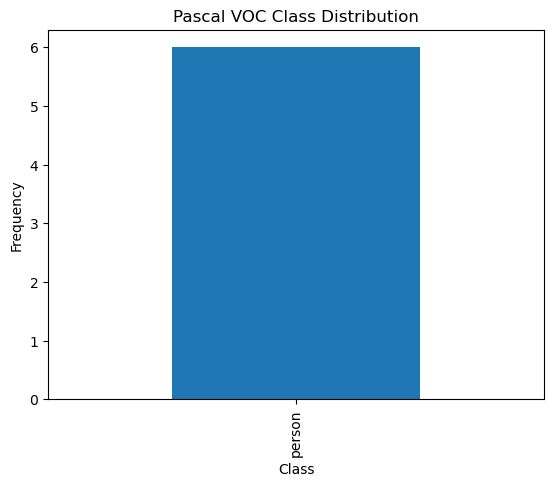

FileNotFoundError: [Errno 2] No such file or directory: 'C:/Code/Multi-Format Annotation Handler and Converter/data/labelme_sample.json'

In [48]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import xml.etree.ElementTree as ET

# Function to extract classes from COCO format
def extract_classes_from_coco(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)

    print("Keys in the JSON file:", data.keys())  # Debug print to see the keys

    if 'annotations' not in data:
        raise KeyError("The COCO JSON file must contain 'annotations' key.")

    # Embedded category information
    categories = {cat['id']: cat['name'] for cat in data.get('categories', [])}
    class_ids = [annotation['category_id'] for annotation in data['annotations'] if 'category_id' in annotation]
    classes = [categories[id] for id in class_ids if id in categories]
    
    return classes

# Function to extract classes from Pascal VOC format
def extract_classes_from_voc(input_file):
    tree = ET.parse(input_file)
    root = tree.getroot()
    
    classes = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        classes.append(class_name)
    
    return classes

# Function to extract classes from LabelMe format
def extract_classes_from_labelme(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)

    classes = [shape['label'] for shape in data['shapes']]
    
    return classes

# Function to plot class distribution
def plot_class_distribution(classes, title):
    class_counts = Counter(classes)
    if not class_counts:
        print("No valid classes found in annotations.")
        return
    
    df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
    df = df.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 8))
    df.plot(kind='bar', legend=False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Example usage for COCO
coco_classes = extract_classes_from_coco("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json")
plot_class_distribution(coco_classes, 'COCO Class Distribution')

# Example usage for Pascal VOC
voc_classes = extract_classes_from_voc("C:/Code/Multi-Format Annotation Handler and Converter/data/sample.xml")
plot_class_distribution(voc_classes, 'Pascal VOC Class Distribution')

# Example usage for LabelMe
labelme_classes = extract_classes_from_labelme("C:/Code/Multi-Format Annotation Handler and Converter/data/labelme_sample.json")
plot_class_distribution(labelme_classes, 'LabelMe Class Distribution')


No valid classes found for COCO Class Distribution.


<Figure size 1200x800 with 0 Axes>

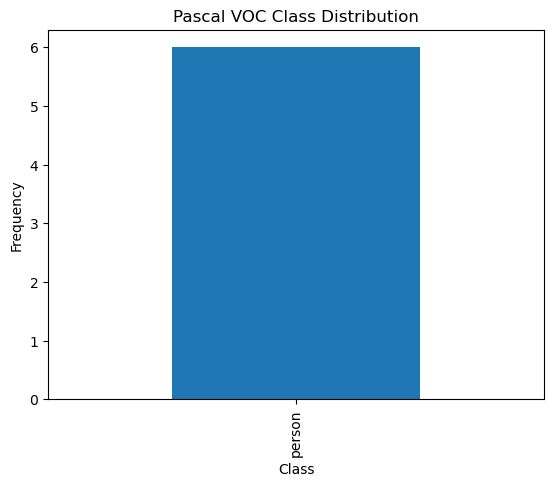

<Figure size 1200x800 with 0 Axes>

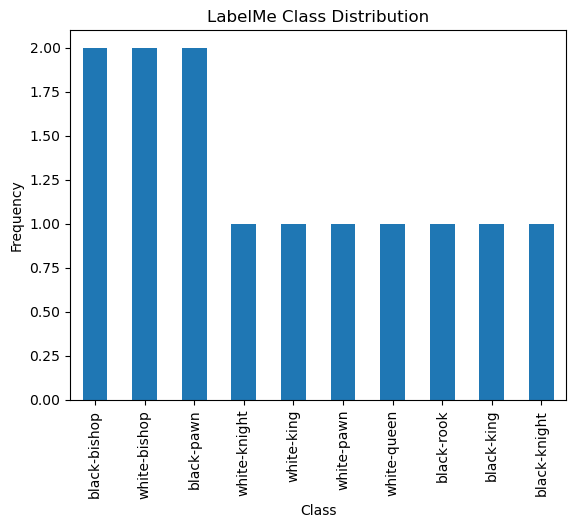

In [50]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import xml.etree.ElementTree as ET
import os

# Function to extract classes from COCO format
def extract_classes_from_coco(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    with open(input_file, 'r') as f:
        data = json.load(f)

    if 'annotations' not in data:
        raise KeyError("The COCO JSON file must contain 'annotations' key.")

    categories = {cat['id']: cat['name'] for cat in data.get('categories', [])}
    class_ids = [annotation['category_id'] for annotation in data['annotations'] if 'category_id' in annotation]
    classes = [categories[id] for id in class_ids if id in categories]
    
    return classes

# Function to extract classes from Pascal VOC format
def extract_classes_from_voc(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    tree = ET.parse(input_file)
    root = tree.getroot()
    
    classes = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        classes.append(class_name)
    
    return classes

# Function to extract classes from LabelMe format
def extract_classes_from_labelme(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    with open(input_file, 'r') as f:
        data = json.load(f)

    classes = [shape['label'] for shape in data['shapes']]
    
    return classes

# Function to plot class distribution
def plot_class_distribution(classes, title):
    if not classes:
        print(f"No valid classes found for {title}.")
        return
    
    class_counts = Counter(classes)
    df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
    df = df.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 8))
    df.plot(kind='bar', legend=False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

# Example usage for COCO
coco_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json"
coco_classes = extract_classes_from_coco(coco_file)
plot_class_distribution(coco_classes, 'COCO Class Distribution')

# Example usage for Pascal VOC
voc_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/sample.xml"
voc_classes = extract_classes_from_voc(voc_file)
plot_class_distribution(voc_classes, 'Pascal VOC Class Distribution')

# Example usage for LabelMe
labelme_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/labelchess.json"
labelme_classes = extract_classes_from_labelme(labelme_file)
plot_class_distribution(labelme_classes, 'LabelMe Class Distribution')


No valid classes found for COCO Class Distribution.


<Figure size 1200x800 with 0 Axes>

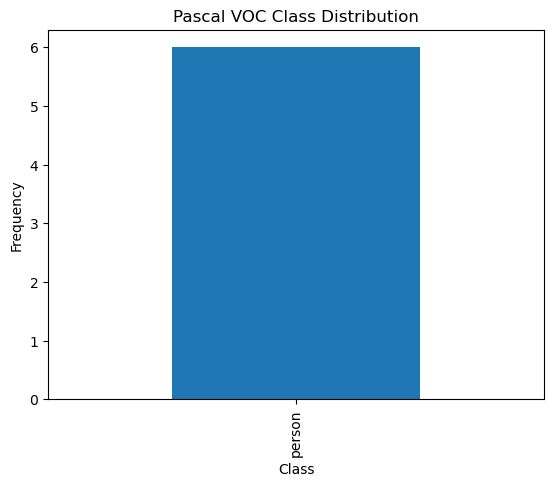

<Figure size 1200x800 with 0 Axes>

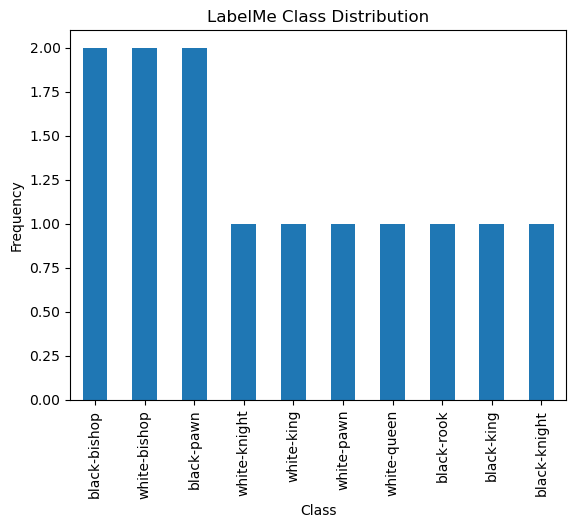

In [1]:
import json
import pandas as pd
import matplotlib.pyplot as plt
from collections import Counter
import xml.etree.ElementTree as ET
import os

def extract_classes_from_coco(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    with open(input_file, 'r') as f:
        data = json.load(f)

    if 'annotations' not in data:
        raise KeyError("The COCO JSON file must contain 'annotations' key.")

    categories = {cat['id']: cat['name'] for cat in data.get('categories', [])}
    class_ids = [annotation['category_id'] for annotation in data['annotations'] if 'category_id' in annotation]
    classes = [categories[id] for id in class_ids if id in categories]
    
    return classes

def extract_classes_from_voc(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    tree = ET.parse(input_file)
    root = tree.getroot()
    
    classes = []
    for obj in root.findall('object'):
        class_name = obj.find('name').text
        classes.append(class_name)
    
    return classes

def extract_classes_from_labelme(input_file):
    if not os.path.isfile(input_file):
        print(f"File not found: {input_file}")
        return []
    
    with open(input_file, 'r') as f:
        data = json.load(f)

    classes = [shape['label'] for shape in data['shapes']]
    
    return classes

def plot_class_distribution(classes, title):
    if not classes:
        print(f"No valid classes found for {title}.")
        return
    
    class_counts = Counter(classes)
    df = pd.DataFrame.from_dict(class_counts, orient='index', columns=['Count'])
    df = df.sort_values(by='Count', ascending=False)

    plt.figure(figsize=(12, 8))
    df.plot(kind='bar', legend=False)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.xticks(rotation=90)
    plt.show()

coco_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/sample.json"
coco_classes = extract_classes_from_coco(coco_file)
plot_class_distribution(coco_classes, 'COCO Class Distribution')

voc_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/sample.xml"
voc_classes = extract_classes_from_voc(voc_file)
plot_class_distribution(voc_classes, 'Pascal VOC Class Distribution')

labelme_file = "C:/Code/Multi-Format Annotation Handler and Converter/data/labelchess.json"
labelme_classes = extract_classes_from_labelme(labelme_file)
plot_class_distribution(labelme_classes, 'LabelMe Class Distribution')
